In [33]:
#import necessary libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical data visualization
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Training Data exploration

In [34]:
trainTitanicData = pd.read_csv('../data/train.csv')
print("The first few rows of the data")
print(trainTitanicData.head())

The first few rows of the data
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3734

In [35]:
trainMissingData = trainTitanicData.isnull().sum()
print("\nMissing values in each column:")
print(trainMissingData)


Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [36]:
#Display summary statistics
trainSummaryStats = trainTitanicData.describe()
print("\nSummary stats for numeric features")
print(trainSummaryStats)


Summary stats for numeric features


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


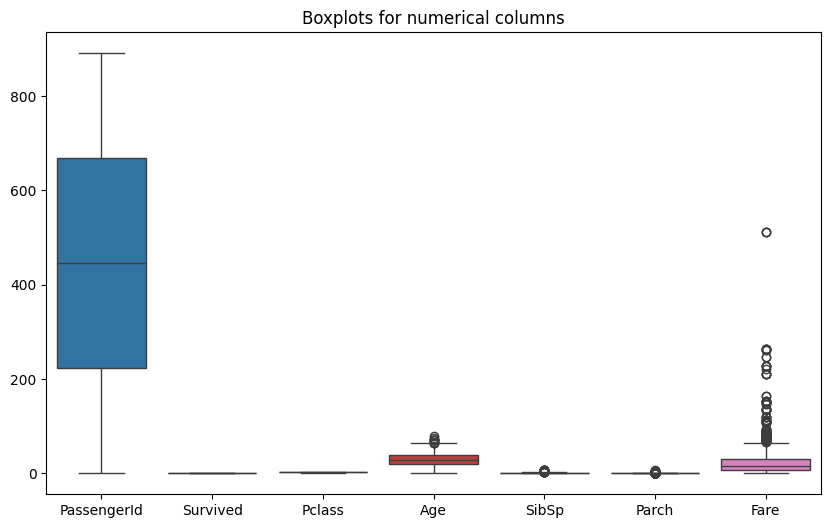

In [37]:
#visualise data
plt.figure(figsize=(10,6))
sns.boxplot(data=trainTitanicData.select_dtypes(include=['float64', 'int64'])) # Create boxplots for numerical features
plt.title("Boxplots for numerical columns")
plt.show()

 Training Data Preprocessing

In [38]:
#Make a copy of teh original data
trainTitanicData = trainTitanicData.copy()

#Handle missing values
#Replace missing Age values with the median age value
trainTitanicData['Age'].fillna(trainTitanicData['Age'].median(), inplace=True)

#Replace missing Embarked values with the most common value
trainTitanicData['Embarked'].fillna(trainTitanicData['Embarked'].mode()[0], inplace=True)

#Cabin has many missing values so I will drop that column
trainTitanicData.drop('Cabin',axis=1,inplace=True)
#Check if there are still missing values
print("Confirming the number of missing values")
print(trainTitanicData.isnull().sum())

Confirming the number of missing values
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [39]:
#Converting Categorial Data to numerical
trainTitanicData = pd.get_dummies(trainTitanicData, columns=['Sex', 'Embarked'],drop_first = True)
print(trainTitanicData.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500      True       False        True  
1          PC 17599  71.2833     False       False       False  
2  STON/O2. 3101282   7.9250     False       False        True  
3            113803  53.1000     False       False        True  
4

In [40]:
# Drop columns that are not useful for prediction
trainTitanicData.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
#Splitting data into features and labels
X = trainTitanicData.drop('Survived', axis = 1)
Y = trainTitanicData['Survived']

#Splitting training data into training and validation
xTrain, xVal, yTrain, yVal =  train_test_split(X,Y,test_size=0.2,random_state=42)

Logistic Regression Training

In [41]:
logreg = LogisticRegression(max_iter= 1000)  #Initialising model
logreg.fit(xTrain, yTrain)  #Training the model
yPredictedValue = logreg.predict(xVal)  #predicting on validation set

#Evaluating model
accuracy = accuracy_score(yVal, yPredictedValue)
precision = precision_score(yVal,yPredictedValue)
recall = recall_score(yVal, yPredictedValue)
f1 = f1_score(yVal, yPredictedValue)
confusionMatrix = confusion_matrix(yVal, yPredictedValue)

print("Logistic Regression accuracy: "+ str(accuracy))
print("Precision: "+ str(precision))
print("Recall: "+ str(recall))
print("F1-Score: "+ str(f1))
print(confusionMatrix)

Logistic Regression accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1-Score: 0.7638888888888888
[[90 15]
 [19 55]]


Dicision Tree Training

In [42]:
dTree =  DecisionTreeClassifier(random_state=42)
dTree.fit(xTrain, yTrain)   #Training model
yPredictedValue = dTree.predict(xVal)   #predicting on Validation set


#Evaluating model
accuracy = accuracy_score(yVal, yPredictedValue)
precision = precision_score(yVal,yPredictedValue)
recall = recall_score(yVal, yPredictedValue)
f1 = f1_score(yVal, yPredictedValue)
confusionMatrix = confusion_matrix(yVal, yPredictedValue)

print("Decision Tree accuracy: "+ str(accuracy))
print("Precision: "+ str(precision))
print("Recall: "+ str(recall))
print("F1-Score: "+ str(f1))
print(confusionMatrix)


Decision Tree accuracy: 0.7821229050279329
Precision: 0.7272727272727273
Recall: 0.7567567567567568
F1-Score: 0.7417218543046358
[[84 21]
 [18 56]]


Random Forest Training

In [43]:
rForest = RandomForestClassifier(random_state=42)   #initialise model
rForest.fit(xTrain, yTrain) #Train model
yPredictedValue = rForest.predict(xVal) #predicting on Validation set

#Evaluating model
accuracy = accuracy_score(yVal, yPredictedValue)
precision = precision_score(yVal,yPredictedValue)
recall = recall_score(yVal, yPredictedValue)
f1 = f1_score(yVal, yPredictedValue)
confusionMatrix = confusion_matrix(yVal, yPredictedValue)

print("Random Forest accuracy: "+ str(accuracy))
print("Precision: "+ str(precision))
print("Recall: "+ str(recall))
print("F1-Score: "+ str(f1))
print(confusionMatrix)

Random Forest accuracy: 0.8212290502793296
Precision: 0.8
Recall: 0.7567567567567568
F1-Score: 0.7777777777777778
[[91 14]
 [18 56]]


Hyperparameter tuning for Random Forest

In [44]:
# Define parameter grid
paramGrid = {
    'n_estimators': [50, 100, 200, 400],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Initializing GridSearchCV
gridSearch = GridSearchCV(estimator=rForest, param_grid=paramGrid, cv=5, n_jobs=-1, verbose=2, error_score='raise')
gridSearch.fit(xTrain, yTrain)

# Best parameters and best model
bestParams = gridSearch.best_params_
bestModel = gridSearch.best_estimator_

# Predicting on the validation set
yPredictedValue = bestModel.predict(xVal)

# Evaluating the model
accuracy = accuracy_score(yVal, yPredictedValue)
precision = precision_score(yVal, yPredictedValue)
recall = recall_score(yVal, yPredictedValue)
f1 = f1_score(yVal, yPredictedValue)
confusionMatrix = confusion_matrix(yVal, yPredictedValue)

print("Best Model accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1-Score: " + str(f1))
print(confusionMatrix)

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits
Best Model accuracy: 0.8324022346368715
Precision: 0.8666666666666667
Recall: 0.7027027027027027
F1-Score: 0.7761194029850748
[[97  8]
 [22 52]]


Test Data preprocessing

In [45]:
#Load the test data
testTitanicData = pd.read_csv('../data/test.csv')
print("Overview of the test data")
print(testTitanicData.head())

Overview of the test data
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [46]:
# Check for missing data
testMissingData = testTitanicData.isnull().sum()
print("Missing data in each column for the test data")
print(testMissingData)

Missing data in each column for the test data
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [47]:
#Display summary statistics
testSummaryStats = testTitanicData.describe()
print("\nSummary stats for numeric features")
print(testSummaryStats)


Summary stats for numeric features
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


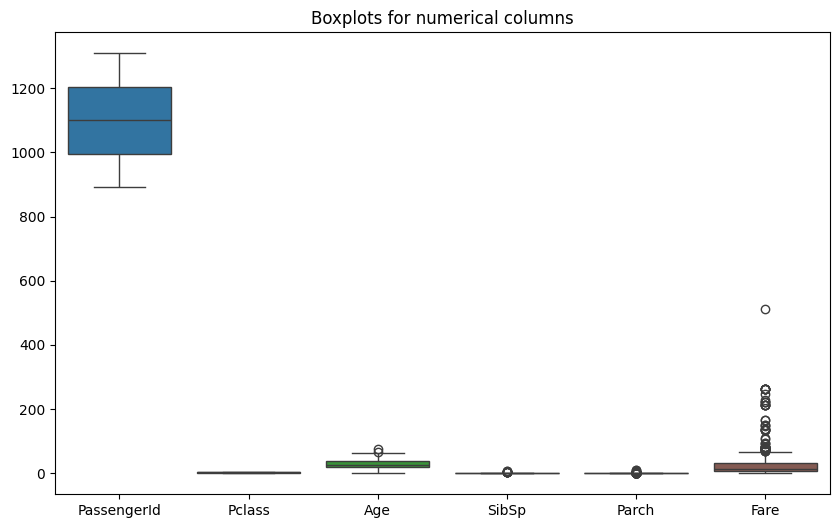

In [48]:
#visualise data
plt.figure(figsize=(10,6))
sns.boxplot(data=testTitanicData.select_dtypes(include=['float64', 'int64'])) # Create boxplots for numerical features
plt.title("Boxplots for numerical columns")
plt.show()

In [49]:
#Make a copy of the original data
testTitanicDataCopy = testTitanicData.copy()

#Handle missing values
#Replace missing Age values with the median age value
testTitanicDataCopy['Age'].fillna(testTitanicDataCopy['Age'].median(), inplace=True)

#Replace missing Fare values with the most common value
testTitanicDataCopy['Fare'].fillna(testTitanicDataCopy['Fare'].median(), inplace=True)

#Cabin was dropped in training so drop it here in test too, it also has a lot of missing values
testTitanicDataCopy.drop('Cabin',axis=1,inplace=True)


#Check if there are still missing values
print("Confirming the number of missing values")
print(testTitanicDataCopy.isnull().sum())

Confirming the number of missing values
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [50]:
testTitanicDataCopy = pd.get_dummies(testTitanicDataCopy, columns=['Sex', 'Embarked'],drop_first = True)
print(testTitanicDataCopy.head())

   PassengerId  Pclass                                          Name   Age  \
0          892       3                              Kelly, Mr. James  34.5   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  47.0   
2          894       2                     Myles, Mr. Thomas Francis  62.0   
3          895       3                              Wirz, Mr. Albert  27.0   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  22.0   

   SibSp  Parch   Ticket     Fare  Sex_male  Embarked_Q  Embarked_S  
0      0      0   330911   7.8292      True        True       False  
1      1      0   363272   7.0000     False       False        True  
2      0      0   240276   9.6875      True        True       False  
3      0      0   315154   8.6625      True       False        True  
4      1      1  3101298  12.2875     False       False        True  


Final Model Training

In [54]:
#Training final model
finalModel = RandomForestClassifier(**bestParams,random_state=42)
finalModel.fit(X,Y)

#Predicting on the test data
testTitanicDataCopy.drop(['Name', 'Ticket'], axis=1, inplace=True)
testTitanicDataCopyProcessed = testTitanicDataCopy.drop(columns=['PassengerId'])
testPredictions = finalModel.predict(testTitanicDataCopyProcessed)

results = pd.DataFrame({
    'PassengerId' : testTitanicDataCopy['PassengerId'], 'Survived' : testPredictions
})
results.to_csv('results.csv', index=False)


